<a href="https://colab.research.google.com/github/thippeshms/thippeshms/blob/main/GOLD_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# using random forest

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
gd=pd.read_csv('/content/gld_price_data.csv')
gd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gd.shape

(2290, 6)

In [ ]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
coreleation=gd.corr()
coreleation

<ipython-input-66-3059d90efd6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coreleation=gd.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

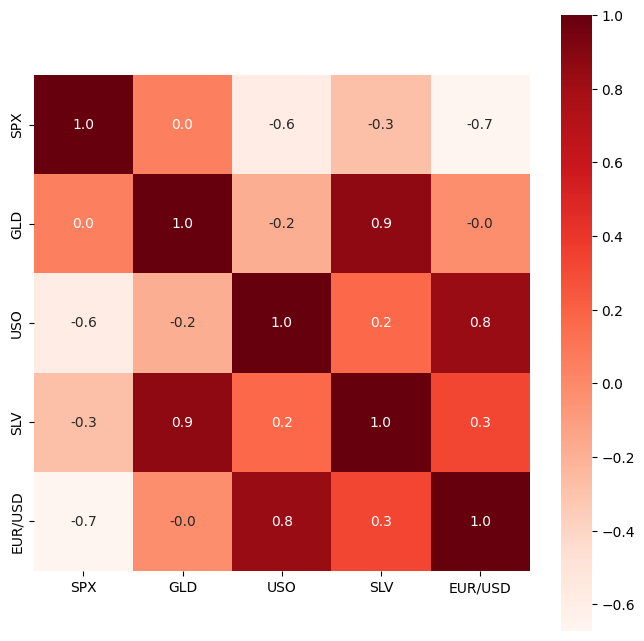

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(coreleation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

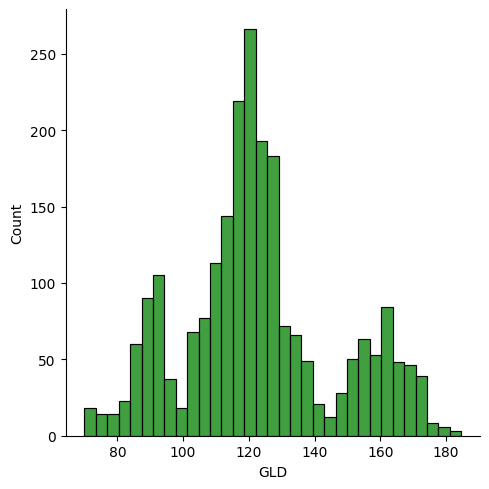

In [ ]:
sns.displot(gd['GLD'],color='green')

In [ ]:
x=gd.drop(['Date','GLD'],axis=1)
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
y=gd['GLD']
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#MODEL BUILDING

In [ ]:
rg=RandomForestRegressor()
rg.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rg.predict(x_test)
y_pred

array([168.8183995 ,  82.3604998 , 116.21939992, 127.52680077,
       120.49260134, 154.79129774, 150.52649865, 126.31940039,
       117.38279885, 126.00080076, 116.51080116, 172.16140092,
       141.53119878, 167.98459852, 115.18739986, 117.74660035,
       139.39060288, 170.11720101, 159.44740273, 158.85649939,
       155.11249992, 125.39559993, 175.70239967, 156.63570376,
       125.19050045,  93.87839966,  76.97720044, 120.59100022,
       119.02119902, 167.45059983,  88.07870024, 125.27780007,
        91.11620067, 117.76960011, 121.13939903, 136.29150078,
       115.44950097, 115.17740089, 147.89750035, 107.1464009 ,
       104.66820273,  87.13359797, 126.56140054, 117.90409971,
       153.031899  , 119.69430009, 108.50879916, 107.92009822,
        93.06870018, 127.12259768,  74.88040047, 113.64789923,
       121.26899999, 111.26839928, 118.83329873, 120.64989953,
       159.75109984, 169.01800095, 147.04379715,  85.94029887,
        94.31220046,  86.9508988 ,  90.28469995, 119.05

In [ ]:
from sklearn import metrics
r2=metrics.r2_score(y_test,y_pred)
r2

0.9888898041609699

In [ ]:
y_test=list(y_test)

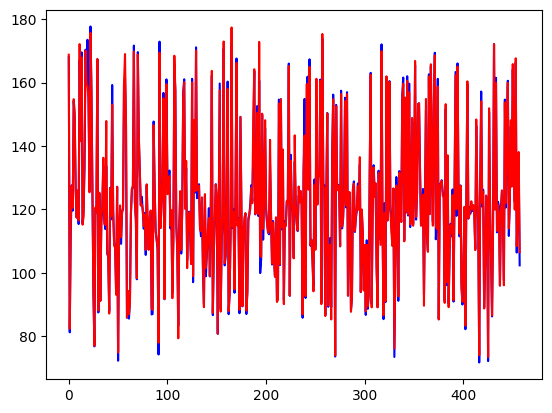

In [ ]:
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(y_pred,color='red',label='Predicted value')

In [ ]:
import numpy as np
input_data=(1447.160034,78.470001,15.1800,1.471692)
convert_to_array=np.asarray(input_data)
re_shape=convert_to_array.reshape(1,-1)
prediction=rg.predict(re_shape)
print(prediction)

[84.93200019]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
